In [72]:
from ray.tune.analysis import Analysis
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np

In [73]:
analysis = Analysis("/home/sergei/ray_results/adversarial_sizes")

In [74]:
target = 'policy_reward_mean/player_1'

In [75]:
df = analysis.dataframe(metric=target, mode='max')

In [76]:
df.iloc[0]

episode_reward_max                                                          6.73144
episode_reward_min                                                         -4.17688
episode_reward_mean                                                         5.09732
episode_len_mean                                                            169.154
episodes_this_iter                                                              273
                                                        ...                        
config/rollout_fragment_length                                                 2866
config/sgd_minibatch_size                                                     22628
config/train_batch_size                                                       42880
config/use_gae                                                                 True
logdir                            /home/sergei/ray_results/adversarial_sizes/tra...
Name: 0, Length: 97, dtype: object

In [77]:
df.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore',
       'checkpoint_rllib', 'trainer_iteration', 'trial_id', 'experiment_tag',
       'policy_reward_min/player_1', 'policy_reward_min/player_2',
       'policy_reward_max/player_1', 'policy_reward_max/player_2',
       'policy_reward_mean/player_1', 'policy_reward_mean/player_2',
       'hist_stats/episode_reward', 'hist_stats/episode_lengths',
       'hist_stats/policy_player_1_reward',
       'hist_stats/policy_player_2_reward', 'sampler_perf/mean_env_wait_ms',
       'sampler_perf/mean_processing_ms', 'sampler_perf/mean_inference_ms',
       'timers/sample_time_ms', 't

In [78]:
df = df.sort_values(target, ascending=False)

(array([3., 2., 0., 0., 3., 0., 2., 1., 0., 1.]),
 array([-7.06959707, -6.34939233, -5.62918759, -4.90898285, -4.18877811,
        -3.46857337, -2.74836863, -2.02816389, -1.30795915, -0.58775441,
         0.13245033]),
 <a list of 10 Patch objects>)

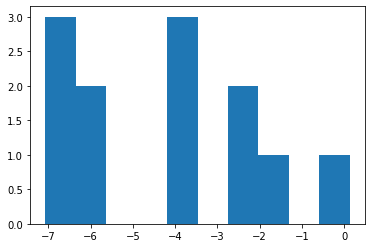

In [79]:
plt.hist(df[target])

In [85]:
df['fcnet_hiddens'] = [x['fcnet_hiddens'] for x in df['config/_model_params']]

In [95]:
def weights(arr):
    arr = [380] + list(arr) + [17]
    x_old = arr[0]
    w = 0
    for x in arr[1:]:
        w += x_old * x + x
        x_old = x
    return w
df['layers'] = [len(x) for x in df['fcnet_hiddens']]
df['neurons'] = [x[0] for x in df['fcnet_hiddens']]
df['weights'] = [weights(x) for x in df['fcnet_hiddens']]

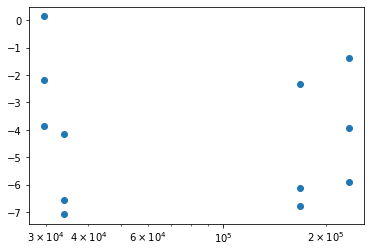

In [99]:
plt.scatter(df['weights'], df[target])
plt.xscale('log')

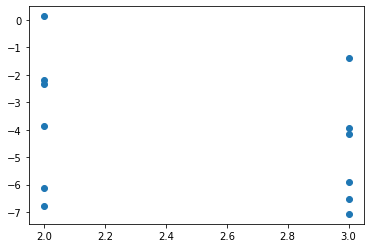

In [100]:
plt.scatter(df['layers'], df[target])

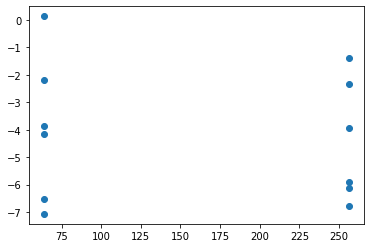

In [101]:
plt.scatter(df['neurons'], df[target])

In [61]:
best_trial = df.iloc[2].logdir
df.iloc[0]

policy_reward_mean/player_1                                                -3.64121
config/_base_dir                        /scratch/sergei/better-adversarial-defenses
config/_call                      {'checkpoint_freq': 0, 'name': 'adversarial_li...
config/_env                       {'env_name': 'multicomp/YouShallNotPassHumans-...
config/_env_fcn                             <function create_env at 0x7f6462e5b710>
config/_env_name_rllib                                                    multicomp
config/_log_error                                                              True
config/_main_filename             /scratch/sergei/better-adversarial-defenses/tr...
config/_model_params              {'custom_model': 'LinearModel', 'custom_model_...
config/_num_workers_tf                                                            4
config/_policies                                   [None, from_scratch, pretrained]
config/_policy                                                              

In [62]:
df

,policy_reward_mean/player_1,config/_base_dir,config/_call,config/_env,config/_env_fcn,config/_env_name_rllib,config/_log_error,config/_main_filename,config/_model_params,config/_num_workers_tf,...,config/lr,config/num_envs_per_worker,config/num_gpus,config/num_sgd_iter,config/num_workers,config/rollout_fragment_length,config/sgd_minibatch_size,config/train_batch_size,config/use_gae,logdir
3,-3.641208,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_li...",{'env_name': 'multicomp/YouShallNotPassHumans-...,<function create_env at 0x7f6462e5b710>,multicomp,True,/scratch/sergei/better-adversarial-defenses/tr...,"{'custom_model': 'LinearModel', 'custom_model_...",4,...,0.000755,4,0,5,8,2866,22628,42880,True,/home/sergei/ray_results/adversarial_linear/tr...
0,-5.884354,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_li...",{'env_name': 'multicomp/YouShallNotPassHumans-...,<function create_env at 0x7f6462e5b710>,multicomp,True,/scratch/sergei/better-adversarial-defenses/tr...,"{'custom_model': 'LinearModel', 'custom_model_...",4,...,0.000755,4,0,5,8,2866,22628,42880,True,/home/sergei/ray_results/adversarial_linear/tr...
2,-8.736462,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_li...",{'env_name': 'multicomp/YouShallNotPassHumans-...,<function create_env at 0x7f6462e5b710>,multicomp,True,/scratch/sergei/better-adversarial-defenses/tr...,"{'custom_model': 'LinearModel', 'custom_model_...",4,...,0.000755,4,0,5,8,2866,22628,42880,True,/home/sergei/ray_results/adversarial_linear/tr...
1,-9.108062,/scratch/sergei/better-adversarial-defenses,"{'checkpoint_freq': 0, 'name': 'adversarial_li...",{'env_name': 'multicomp/YouShallNotPassHumans-...,<function create_env at 0x7f6462e5b710>,multicomp,True,/scratch/sergei/better-adversarial-defenses/tr...,"{'custom_model': 'LinearModel', 'custom_model_...",4,...,0.000755,4,0,5,8,2866,22628,42880,True,/home/sergei/ray_results/adversarial_linear/tr...


957


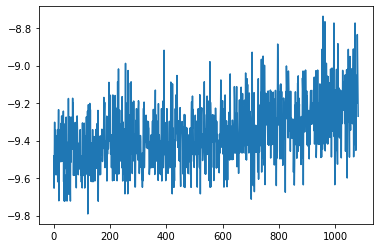

In [63]:
best_df = analysis.trial_dataframes[best_trial]
rew = best_df[target]
plt.plot(rew)
print(np.argmax(rew))

In [64]:
best_trial

'/home/sergei/ray_results/adversarial_linear/train_one_with_sacred_0_2020-08-24_20-10-37qqj3lwd8'

In [38]:
best_df.checkpoint_rllib.iloc[-1]

'/home/sergei/ray_results/PPO_multicomp_2020-08-25_10-42-17yx9c3k0s/checkpoint_387/checkpoint-387'